# **Project :** Evaluating Solutions to Ameliorate the Impact of Food Deserts in Brooklyn Using AI

## **Problem Statement :** Develop a **Clustering** model to identify class labels for Census tracts in Brooklyn (Kings County, New York)

## **1. Import Libraries**

In [1]:
#=================================================================
# For data manipulation, plotting, and miscellaneous libraries
#=================================================================
### Importing GIS Libraries
import geopandas as gpd
import plotly.graph_objects as go

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

### Importing warning library
import warnings
warnings.filterwarnings("ignore")

#=================================================================
# From sklearn import required classes
#=================================================================
import sklearn
from sklearn.cluster import KMeans  
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

## **2. Load the Dataset**

In [2]:
df = pd.read_csv('kings_data_v1.csv')
df.head(2)

,Unnamed: 0,STATEFP,COUNTYFP,TRACTCE,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,...,count_emp_447110,popden_447110,popden_sales_447110,popden_emp_447110,aden_447110,aden_sales_447110,aden_emp_447110,State_Code_y.1,County_Code_y.1,mrFEI
0,0,36,47,57800,1400000US36047057800,36047057800,578.0,CT,172233,0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,36,47,0.291667
1,1,36,47,58900,1400000US36047058900,36047058900,589.0,CT,424025,38353,...,0,0.0,0.0,0.0,0.0,0.0,0.0,36,47,0.333333


In [3]:
df['TRACTCE'] = df['TRACTCE'].apply(lambda x: f'0{x}')

In [4]:
# Assuming df is your DataFrame
columns_to_drop = ['Unnamed: 0', 'AFFGEOID', 'GEOID', 'NAME', 'LSAD', 'AWATER', 'ALAND', 'geometry']
df.drop(columns=columns_to_drop, inplace=True)

In [5]:
df.shape

(754, 318)

In [6]:
df.head(3)

,STATEFP,COUNTYFP,TRACTCE,CensusTract,State,County,Urban,Pop2010,OHU2010,GroupQuartersFlag,...,count_emp_447110,popden_447110,popden_sales_447110,popden_emp_447110,aden_447110,aden_sales_447110,aden_emp_447110,State_Code_y.1,County_Code_y.1,mrFEI
0,36,47,057800,36047057800,New York,Kings County,1,3176,1077,0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,36,47,0.291667
1,36,47,058900,36047058900,New York,Kings County,1,1904,813,0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,36,47,0.333333
2,36,47,037000,36047037000,New York,Kings County,1,4085,1566,0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,36,47,0.285714


In [7]:
### Storing New York Map coordinates of 2019 as a pandas dataframe
ny_map = gpd.read_file(r'cb_2019_36_tract_500k.shp', encoding='utf-8')

In [8]:
### Checking how the dataframe looks like
ny_map.head(5)

,STATEFP,COUNTYFP,TRACTCE,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
0,36,071,000502,1400000US36071000502,36071000502,5.02,CT,967431,969216,"POLYGON ((-74.02226 41.49281, -74.02180 41.496..."
1,36,103,135208,1400000US36103135208,36103135208,1352.08,CT,2287077,0,"POLYGON ((-73.28263 40.83063, -73.28157 40.832..."
2,36,047,057800,1400000US36047057800,36047057800,578,CT,172233,0,"POLYGON ((-73.95398 40.60140, -73.95304 40.601..."
3,36,047,058900,1400000US36047058900,36047058900,589,CT,424025,38353,"POLYGON ((-73.94605 40.72926, -73.94419 40.729..."
4,36,055,013204,1400000US36055013204,36055013204,132.04,CT,28207247,93541,"POLYGON ((-77.66835 43.02829, -77.66806 43.029..."


In [9]:
### Checking if all New York Counties are present in the dataframe

print("The total number of counties present in New York is", ny_map['COUNTYFP'].nunique())

print("Showing all county codes")
ny_map["COUNTYFP"].unique()

The total number of counties present in New York is 62
Showing all county codes


array(['071', '103', '047', '055', '005', '029', '061', '119', '033',
       '001', '085', '069', '067', '081', '007', '107', '051', '059',
       '073', '015', '063', '053', '065', '083', '027', '117', '009',
       '057', '037', '093', '021', '087', '121', '111', '105', '043',
       '019', '109', '023', '011', '113', '091', '035', '013', '099',
       '075', '039', '089', '045', '101', '095', '003', '025', '049',
       '097', '115', '017', '031', '077', '079', '123', '041'],
      dtype=object)

In [10]:
## Select "Kings County" which is code - 047 (Brooklyn Borough)

kings_map = ny_map[ny_map["COUNTYFP"]=="047"]

In [11]:
## Checking the column headers of kings dataframe
kings_map.head(5)

,STATEFP,COUNTYFP,TRACTCE,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
2,36,047,057800,1400000US36047057800,36047057800,578,CT,172233,0,"POLYGON ((-73.95398 40.60140, -73.95304 40.601..."
3,36,047,058900,1400000US36047058900,36047058900,589,CT,424025,38353,"POLYGON ((-73.94605 40.72926, -73.94419 40.729..."
18,36,047,037000,1400000US36047037000,36047037000,370,CT,336242,0,"POLYGON ((-73.96615 40.58667, -73.96564 40.588..."
19,36,047,019900,1400000US36047019900,36047019900,199,CT,188914,0,"POLYGON ((-73.96949 40.68629, -73.96749 40.686..."
26,36,047,040000,1400000US36047040000,36047040000,400,CT,192000,0,"POLYGON ((-73.98078 40.59845, -73.97986 40.598..."


In [12]:
kings_map.shape

(761, 10)

In [13]:
df3 = pd.merge(df, kings_map, on='TRACTCE', how='left')

In [14]:
df3.head(3)

,STATEFP_x,COUNTYFP_x,TRACTCE,CensusTract,State,County,Urban,Pop2010,OHU2010,GroupQuartersFlag,...,mrFEI,STATEFP_y,COUNTYFP_y,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
0,36,47,057800,36047057800,New York,Kings County,1,3176,1077,0,...,0.291667,36,047,1400000US36047057800,36047057800,578,CT,172233.0,0.0,"POLYGON ((-73.95398 40.60140, -73.95304 40.601..."
1,36,47,058900,36047058900,New York,Kings County,1,1904,813,0,...,0.333333,36,047,1400000US36047058900,36047058900,589,CT,424025.0,38353.0,"POLYGON ((-73.94605 40.72926, -73.94419 40.729..."
2,36,47,037000,36047037000,New York,Kings County,1,4085,1566,0,...,0.285714,36,047,1400000US36047037000,36047037000,370,CT,336242.0,0.0,"POLYGON ((-73.96615 40.58667, -73.96564 40.588..."


In [15]:
df3.columns

Index(['STATEFP_x', 'COUNTYFP_x', 'TRACTCE', 'CensusTract', 'State', 'County',
       'Urban', 'Pop2010', 'OHU2010', 'GroupQuartersFlag',
       ...
       'mrFEI', 'STATEFP_y', 'COUNTYFP_y', 'AFFGEOID', 'GEOID', 'NAME', 'LSAD',
       'ALAND', 'AWATER', 'geometry'],
      dtype='object', length=327)

In [16]:
df1 = pd.DataFrame()

In [17]:
df1['TRACTCE'] = df3['TRACTCE']
df1.head(3)

,TRACTCE
0,057800
1,058900
2,037000


In [18]:
#df1['affluence'] = df3['AFFLUENCE16_20']

In [19]:
df1['Disadvantage'] = df3['DISADVANTAGE16_20']
df1.head(3)

,TRACTCE,Disadvantage
0,057800,0.253814667
1,058900,NaN
2,037000,0.21440649


In [20]:
df1['Medfaminc'] = df3['MEDFAMINC16_20']
df1.head(3)

,TRACTCE,Disadvantage,Medfaminc
0,057800,0.253814667,87500
1,058900,NaN,NaN
2,037000,0.21440649,87813


In [21]:
df1['Medfaminc'] = pd.to_numeric(df1['Medfaminc'], errors = 'coerce')
#df1['affluence'] = pd.to_numeric(df1['affluence'], errors = 'coerce')
df1['Disadvantage'] = pd.to_numeric(df1['Disadvantage'], errors = 'coerce')

In [22]:
#df1['Medfaminc'] = df1['Medfaminc']/4
df1['Medfaminc'] = df1['Medfaminc']   # for consistency with classification model not dividing by 4 (which was assumed as 4 people in a family)
df1.head(3)

,TRACTCE,Disadvantage,Medfaminc
0,057800,0.253815,87500.0
1,058900,NaN,NaN
2,037000,0.214406,87813.0


In [23]:
df3['SNAP'] = pd.to_numeric(df3['PPUBAS16_20'], errors='coerce')
df1.head(3)

,TRACTCE,Disadvantage,Medfaminc
0,057800,0.253815,87500.0
1,058900,NaN,NaN
2,037000,0.214406,87813.0


In [24]:
df1['SNAP%'] = df3['SNAP']
df1.head(3)

,TRACTCE,Disadvantage,Medfaminc,SNAP%
0,057800,0.253815,87500.0,0.276615
1,058900,NaN,NaN,NaN
2,037000,0.214406,87813.0,0.178423


In [25]:
df1['PovertyRate'] = df3['PovertyRate']
df1.head(3)

,TRACTCE,Disadvantage,Medfaminc,SNAP%,PovertyRate
0,057800,0.253815,87500.0,0.276615,21.6
1,058900,NaN,NaN,NaN,6.3
2,037000,0.214406,87813.0,0.178423,15.6


In [26]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 754 entries, 0 to 753
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TRACTCE       754 non-null    object 
 1   Disadvantage  711 non-null    float64
 2   Medfaminc     698 non-null    float64
 3   SNAP%         711 non-null    float64
 4   PovertyRate   754 non-null    float64
dtypes: float64(4), object(1)
memory usage: 35.3+ KB


In [27]:
df1.isna().sum()

TRACTCE          0
Disadvantage    43
Medfaminc       56
SNAP%           43
PovertyRate      0
dtype: int64

In [28]:
df2 = df1.dropna()
df2.head()

,TRACTCE,Disadvantage,Medfaminc,SNAP%,PovertyRate
0,057800,0.253815,87500.0,0.276615,21.6
2,037000,0.214406,87813.0,0.178423,15.6
3,019900,0.079001,161250.0,0.049125,12.4
4,040000,0.199686,52750.0,0.223124,13.4
5,098200,0.521628,24956.0,0.475323,46.8


In [29]:
df2.shape

(698, 5)

In [30]:
df2.head()

,TRACTCE,Disadvantage,Medfaminc,SNAP%,PovertyRate
0,057800,0.253815,87500.0,0.276615,21.6
2,037000,0.214406,87813.0,0.178423,15.6
3,019900,0.079001,161250.0,0.049125,12.4
4,040000,0.199686,52750.0,0.223124,13.4
5,098200,0.521628,24956.0,0.475323,46.8


In [31]:
#df2.to_csv('df2.csv')

In [32]:
df2.iloc[200:220, :2]

,TRACTCE,Disadvantage
214,049500,0.144220
215,027000,0.330884
216,028900,0.316434
217,042100,0.258748
218,045300,0.421175
219,051602,0.222379
220,08200,0.228157
221,019400,0.284015
222,091800,0.350351
223,092200,0.210918


In [33]:
# Brooklyn Heights census tract - Not a food desert
centroid_notfooddesert = df2.loc[df2['TRACTCE'] == '0502']  
centroid_notfooddesert

,TRACTCE,Disadvantage,Medfaminc,SNAP%,PovertyRate
168,0502,0.010896,231250.0,0.006148,4.8


In [34]:
# Ocean Hill census tract - food desert
centroid_fooddesert = df2.loc[df2['TRACTCE'] == '037300']
centroid_fooddesert

,TRACTCE,Disadvantage,Medfaminc,SNAP%,PovertyRate
233,037300,0.283491,54896.0,0.239284,30.4


In [35]:
cluster_centroids = df2.loc[(df2['TRACTCE'] == '0502') | (df2['TRACTCE'] == '037300')]
cluster_centroids

,TRACTCE,Disadvantage,Medfaminc,SNAP%,PovertyRate
168,0502,0.010896,231250.0,0.006148,4.8
233,037300,0.283491,54896.0,0.239284,30.4


In [36]:
idx = cluster_centroids.index
idx = list(idx)
idx

[168, 233]

## **3. Split the Data in to Train & Test sets** 

**This is still an open question, will address it later...**

## **4. Standardize the Data**

In [37]:
df_cluster = df2.drop(["TRACTCE"], axis=1)
df_cluster.head(3)

,Disadvantage,Medfaminc,SNAP%,PovertyRate
0,0.253815,87500.0,0.276615,21.6
2,0.214406,87813.0,0.178423,15.6
3,0.079001,161250.0,0.049125,12.4


In [38]:
scaler = StandardScaler()
df_cluster = scaler.fit_transform(df_cluster)

In [39]:
kmeans_centroids = df_cluster[idx]
kmeans_centroids

array([[ 0.00638938, -0.41871956, -0.00371642,  0.03666623],
       [ 0.72602297, -0.12304047,  1.35095795,  0.32499058]])

## **5. Clustering**

### **5.1. Method to find number of Clusters**

### **5.1.1. Elbow method**

In [40]:
wcss = []
clusters = list(np.arange(1,11))
for k in clusters:
    kmeans = KMeans(n_clusters=k,init="k-means++", max_iter=1000)
    kmeans.fit(df_cluster)
    
    wcss.append(kmeans.inertia_)   # append inertia value to a list
    
df_wcss = pd.DataFrame({'Clusters' : clusters, 'WCSS' : wcss})
df_wcss

,Clusters,WCSS
0,1,2792.000000
1,2,1381.700767
2,3,869.420824
3,4,616.610875
4,5,478.492164
5,6,424.951195
6,7,380.620873
7,8,348.562045
8,9,326.555517
9,10,303.805043


[Text(0.5, 1.0, 'WCSS - Elbow method')]

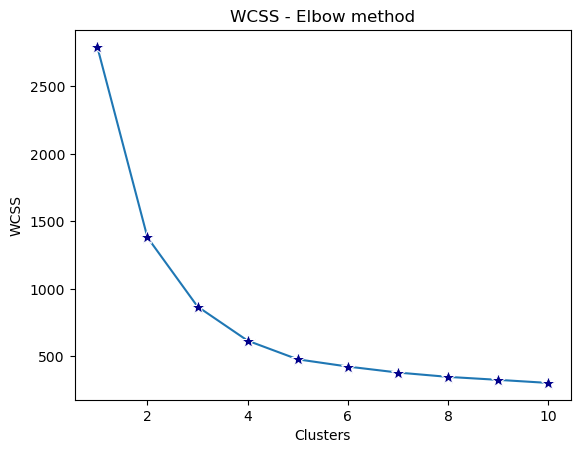

In [41]:
sns.lineplot(data = df_wcss, x = 'Clusters', y = 'WCSS', marker="*", markerfacecolor='darkblue', markersize=10).set(title='WCSS - Elbow method')

### **5.1.2. Silhouette method**

**Silhouette Score:**

+1: This means clusters are clearly distinguished

0: This means clusters are neutral in nature and can not be distinguished properly

-1: This means the clusters are assigned in the wrong way

In [42]:
print('Silhouette Method : ')
print(' ')

n_clusters = list(np.arange(2,11))
sil_scores = []
for num_clusters in n_clusters:    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, init="k-means++", max_iter=1000)
    kmeans.fit(df_cluster)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(df_cluster, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))
    sil_scores.append(silhouette_avg)

Silhouette Method : 
 
For n_clusters=2, the silhouette score is 0.4267629607306668
For n_clusters=3, the silhouette score is 0.40002350944050785
For n_clusters=4, the silhouette score is 0.3857603586342368
For n_clusters=5, the silhouette score is 0.3512602602886543
For n_clusters=6, the silhouette score is 0.3153313262557217
For n_clusters=7, the silhouette score is 0.295862819856682
For n_clusters=8, the silhouette score is 0.2712294593293167
For n_clusters=9, the silhouette score is 0.2613174214066459
For n_clusters=10, the silhouette score is 0.26005708063343913


In [43]:
df_Silscore = pd.DataFrame({'Clusters' : n_clusters, 'Silhouette Score' : sil_scores})
df_Silscore

,Clusters,Silhouette Score
0,2,0.426763
1,3,0.400024
2,4,0.385760
3,5,0.351260
4,6,0.315331
5,7,0.295863
6,8,0.271229
7,9,0.261317
8,10,0.260057


[Text(0.5, 1.0, 'Silhouette method')]

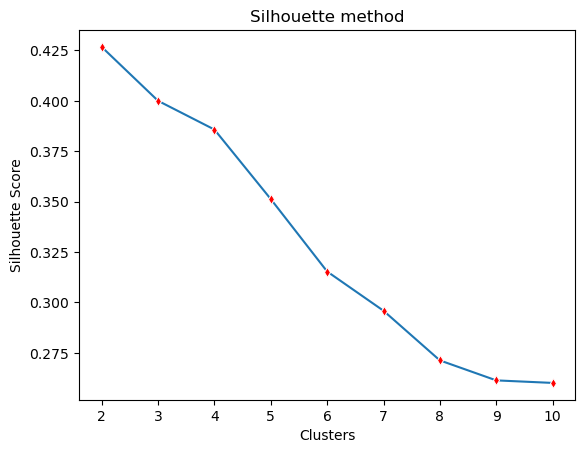

In [44]:
sns.lineplot(data = df_Silscore, x = 'Clusters', y = 'Silhouette Score', marker="d", markerfacecolor='red', markersize=5).set(title='Silhouette method')

#### **Conclusion:** project goal is to classify an area as "food desert" or "not a food desert", that means we need to have two classes, hence we are going with 2 clusters for this dataset.

For information about Silhouette score method refer: https://medium.com/geekculture/stop-using-the-elbow-method-96bcfbbbe9fd

https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py

In [45]:
df2.head(3)

,TRACTCE,Disadvantage,Medfaminc,SNAP%,PovertyRate
0,057800,0.253815,87500.0,0.276615,21.6
2,037000,0.214406,87813.0,0.178423,15.6
3,019900,0.079001,161250.0,0.049125,12.4


In [46]:
df_cluster[:5]

array([[ 0.24320957,  0.07898062,  0.42411874,  0.1808284 ],
       [-0.06514262,  0.08624039, -0.26970263, -0.32797927],
       [-1.12463231,  1.78954953, -1.18332235, -0.59934337],
       [-0.1803246 , -0.72701626,  0.04614993, -0.51454209],
       [ 2.33873164, -1.3716746 ,  1.82818482,  2.31782064]])

### **5.2. K-means clustering**

In [47]:
df_cluster

array([[ 0.24320957,  0.07898062,  0.42411874,  0.1808284 ],
       [-0.06514262,  0.08624039, -0.26970263, -0.32797927],
       [-1.12463231,  1.78954953, -1.18332235, -0.59934337],
       ...,
       [-0.04682142, -0.44940542,  0.25605497, -0.56542286],
       [ 2.57663209, -1.20973301,  2.07082132,  2.76726742],
       [-1.34189876,  0.71681987, -1.45413047, -0.43822094]])

In [48]:
kmeans_centroids

array([[ 0.00638938, -0.41871956, -0.00371642,  0.03666623],
       [ 0.72602297, -0.12304047,  1.35095795,  0.32499058]])

In [49]:
# k-means with some arbitrary k
no_clusters = 2 

#kmeans = KMeans(n_clusters= no_clusters, init="k-means++", max_iter=1000)
kmeans = KMeans(n_clusters= no_clusters, init=kmeans_centroids, max_iter=1000)
kmeans.fit(df_cluster)
kmeans.labels_

array([1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,

In [50]:
df2.head()

,TRACTCE,Disadvantage,Medfaminc,SNAP%,PovertyRate
0,057800,0.253815,87500.0,0.276615,21.6
2,037000,0.214406,87813.0,0.178423,15.6
3,019900,0.079001,161250.0,0.049125,12.4
4,040000,0.199686,52750.0,0.223124,13.4
5,098200,0.521628,24956.0,0.475323,46.8


In [51]:
# assign the label
df2['TargetLabel'] = kmeans.labels_
df2.head()

,TRACTCE,Disadvantage,Medfaminc,SNAP%,PovertyRate,TargetLabel
0,057800,0.253815,87500.0,0.276615,21.6,1
2,037000,0.214406,87813.0,0.178423,15.6,0
3,019900,0.079001,161250.0,0.049125,12.4,0
4,040000,0.199686,52750.0,0.223124,13.4,0
5,098200,0.521628,24956.0,0.475323,46.8,1


In [52]:
df2['TargetLabel'].value_counts()

0    443
1    255
Name: TargetLabel, dtype: int64

In [53]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 698 entries, 0 to 753
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TRACTCE       698 non-null    object 
 1   Disadvantage  698 non-null    float64
 2   Medfaminc     698 non-null    float64
 3   SNAP%         698 non-null    float64
 4   PovertyRate   698 non-null    float64
 5   TargetLabel   698 non-null    int32  
dtypes: float64(4), int32(1), object(1)
memory usage: 35.4+ KB


In [54]:
df3.head(3)

,STATEFP_x,COUNTYFP_x,TRACTCE,CensusTract,State,County,Urban,Pop2010,OHU2010,GroupQuartersFlag,...,STATEFP_y,COUNTYFP_y,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry,SNAP
0,36,47,057800,36047057800,New York,Kings County,1,3176,1077,0,...,36,047,1400000US36047057800,36047057800,578,CT,172233.0,0.0,"POLYGON ((-73.95398 40.60140, -73.95304 40.601...",0.276615
1,36,47,058900,36047058900,New York,Kings County,1,1904,813,0,...,36,047,1400000US36047058900,36047058900,589,CT,424025.0,38353.0,"POLYGON ((-73.94605 40.72926, -73.94419 40.729...",NaN
2,36,47,037000,36047037000,New York,Kings County,1,4085,1566,0,...,36,047,1400000US36047037000,36047037000,370,CT,336242.0,0.0,"POLYGON ((-73.96615 40.58667, -73.96564 40.588...",0.178423


In [55]:
df2.head(3)

,TRACTCE,Disadvantage,Medfaminc,SNAP%,PovertyRate,TargetLabel
0,057800,0.253815,87500.0,0.276615,21.6,1
2,037000,0.214406,87813.0,0.178423,15.6,0
3,019900,0.079001,161250.0,0.049125,12.4,0


In [56]:
df2.shape

(698, 6)

## **6. Export the Labelled Dataset**

In [57]:
result = pd.merge(df3, df2[['TRACTCE', 'TargetLabel']], on='TRACTCE')
result.head(2)

,STATEFP_x,COUNTYFP_x,TRACTCE,CensusTract,State,County,Urban,Pop2010,OHU2010,GroupQuartersFlag,...,COUNTYFP_y,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry,SNAP,TargetLabel
0,36,47,057800,36047057800,New York,Kings County,1,3176,1077,0,...,047,1400000US36047057800,36047057800,578,CT,172233.0,0.0,"POLYGON ((-73.95398 40.60140, -73.95304 40.601...",0.276615,1
1,36,47,037000,36047037000,New York,Kings County,1,4085,1566,0,...,047,1400000US36047037000,36047037000,370,CT,336242.0,0.0,"POLYGON ((-73.96615 40.58667, -73.96564 40.588...",0.178423,0


In [58]:
result.columns

Index(['STATEFP_x', 'COUNTYFP_x', 'TRACTCE', 'CensusTract', 'State', 'County',
       'Urban', 'Pop2010', 'OHU2010', 'GroupQuartersFlag',
       ...
       'COUNTYFP_y', 'AFFGEOID', 'GEOID', 'NAME', 'LSAD', 'ALAND', 'AWATER',
       'geometry', 'SNAP', 'TargetLabel'],
      dtype='object', length=329)

### **6.1. Save Dataset with Labels**

In [64]:
result.to_csv("KingCounty_FoodDeserts_Iteration2_noclasses_2.csv")

In [60]:
from geopandas import GeoDataFrame

merged = GeoDataFrame(result)

In [61]:
merged.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 698 entries, 0 to 697
Columns: 329 entries, STATEFP_x to TargetLabel
dtypes: float64(201), geometry(1), int32(1), int64(82), object(44)
memory usage: 1.8+ MB


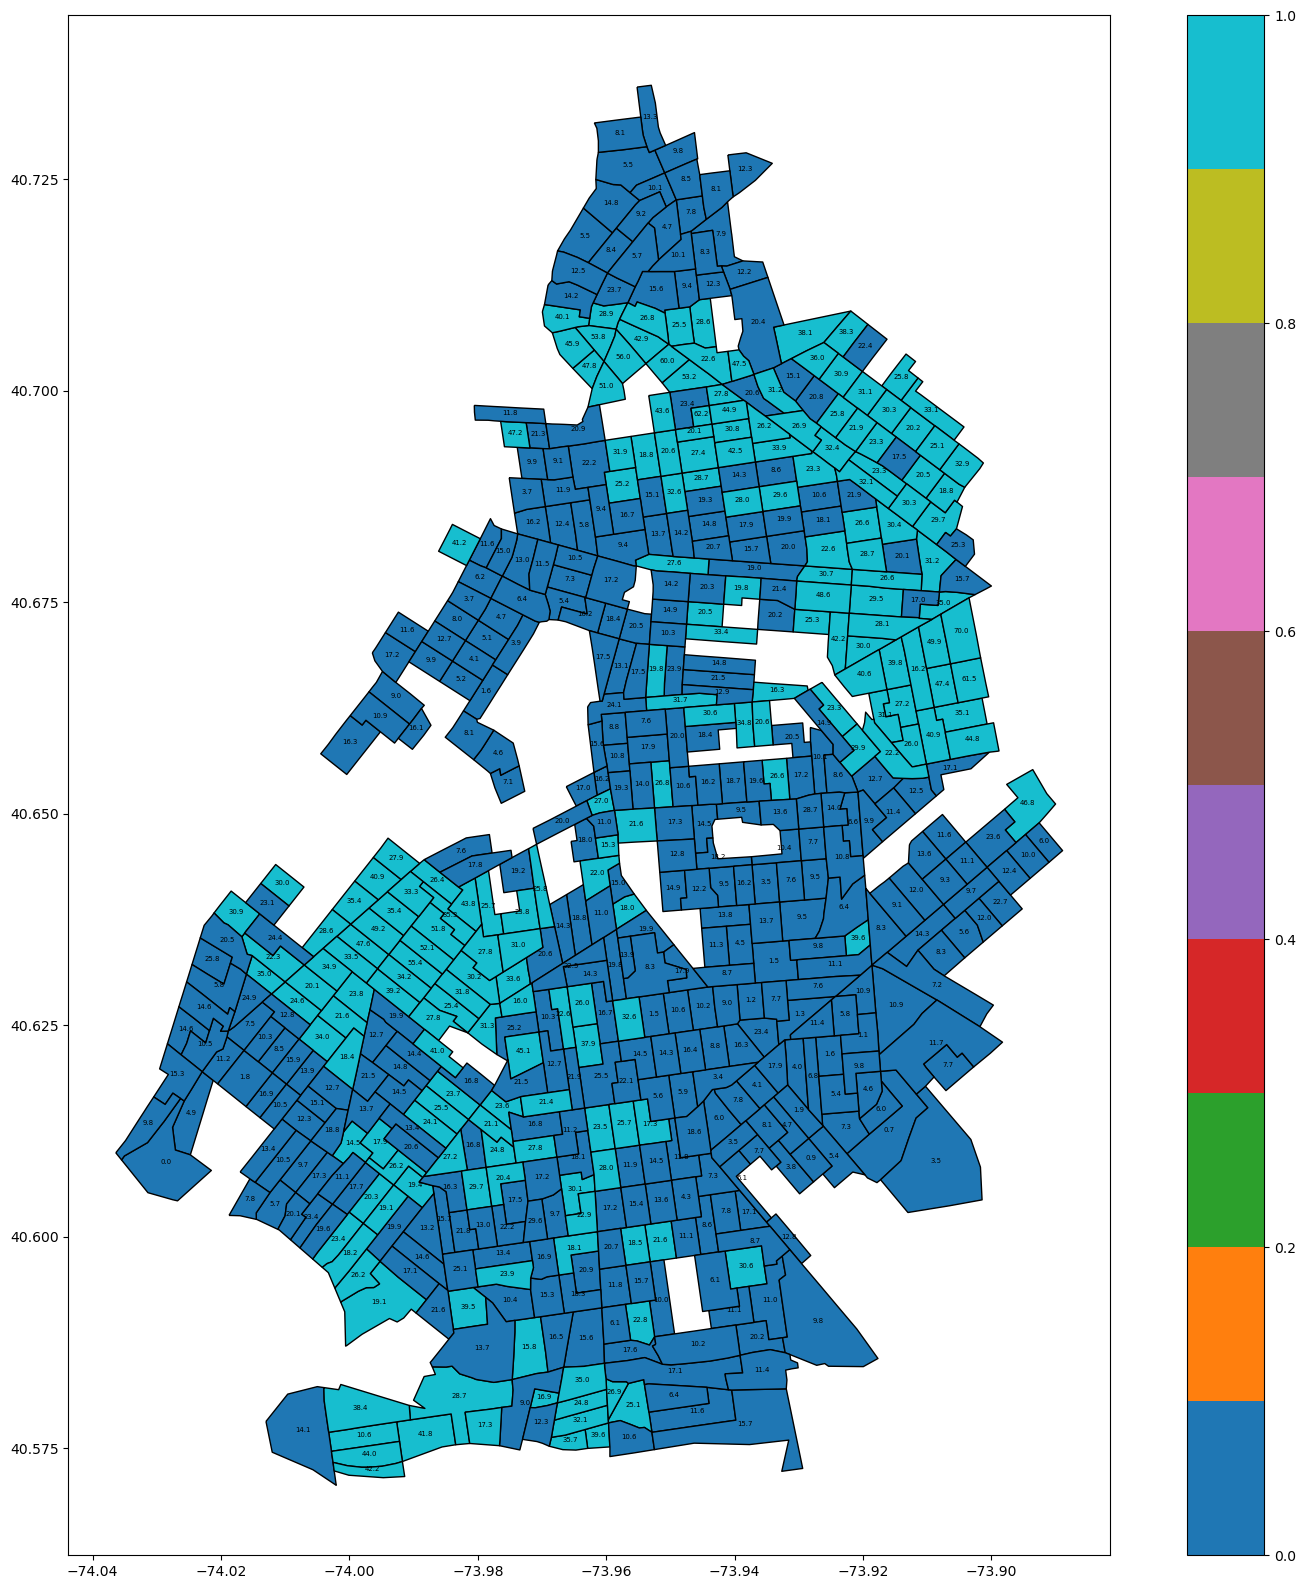

In [62]:
import matplotlib.pyplot as plt

# Assuming 'result' is a GeoDataFrame
fig, ax = plt.subplots(figsize=(20,20))
merged.plot(ax=ax, column='TargetLabel', cmap='tab10', legend=True, edgecolor='black')
ax.set_title('', fontsize=30)

for idx, row in merged.iterrows():
    if row['geometry'] is not None and row['geometry'].is_valid:
        ax.annotate(text=row['PovertyRate'], xy=row['geometry'].centroid.coords[0], ha='center', fontsize=5)

# Show the plot
plt.show()
